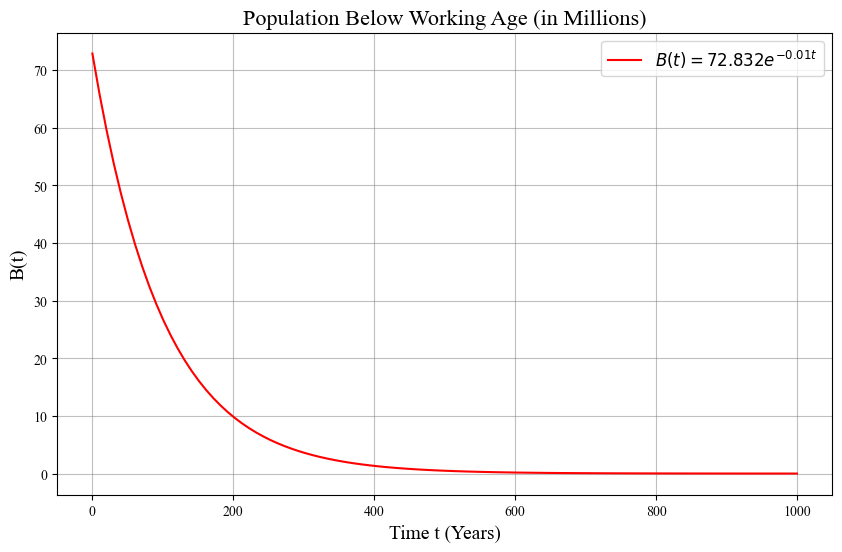

In [2]:
# plot for B(t)
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

r = 0.05
alpha = 0.06

def model(B, t):
    dBdt = r * B - alpha * B
    return dBdt

B0 = 72.832
t = np.linspace(0, 1000, 100)
solution = odeint(model, B0, t)

plt.figure(figsize=(10, 6))
plt.plot(t, solution, label=r"$B(t) = 72.832 e^{-0.01t}$", color="red")
plt.title('Population Below Working Age (in Millions)', fontsize=16, color="black")
plt.xlabel("Time t (Years)", fontsize=14, color="black")
plt.ylabel("B(t)", fontsize=14, color="black")
plt.grid(alpha=0.5, color="gray")
plt.legend(fontsize=12)

plt.savefig("bt_plot.pdf", format="pdf", bbox_inches="tight")

plt.show()


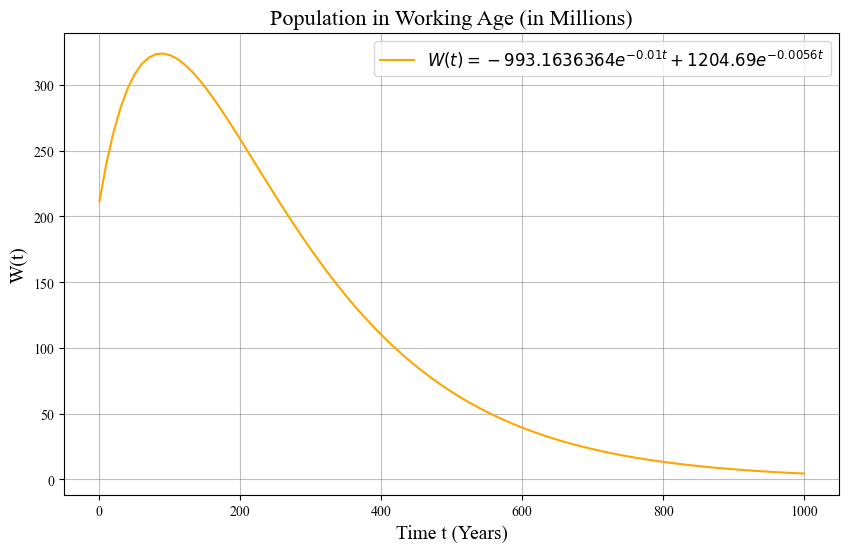

In [4]:
# plot for W(t)
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

def W(t):
    return -993.1636364 * np.exp(-0.01 * t) + 1204.69 * np.exp(-0.0056 * t)

t = np.linspace(0, 1000, 100)
w_values = W(t)


plt.figure(figsize=(10, 6))
plt.plot(t, w_values, label=r"$W(t) = -993.1636364e^{-0.01t} + 1204.69e^{-0.0056t}$", color="orange")
plt.title("Population in Working Age (in Millions)", fontsize=16, color="black")
plt.xlabel("Time t (Years)", fontsize=14, color="black")
plt.ylabel("W(t)", fontsize=14, color="black")
plt.grid(alpha=0.5, color="gray")
plt.legend(fontsize=12)

plt.savefig("wt_plot.pdf", format="pdf", bbox_inches="tight")

plt.show()



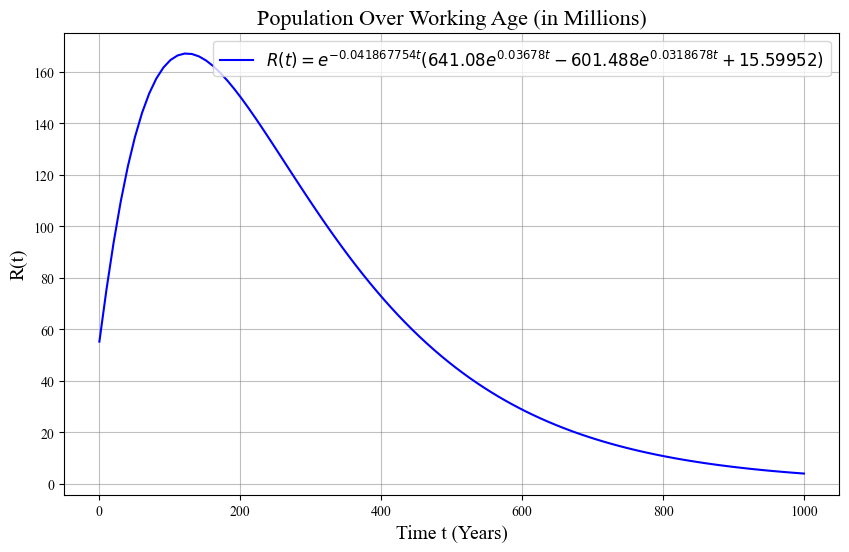

In [1]:
# plot for R(t)
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

def R(t):
    return np.exp(-0.041867754 * t) * (641.08 * np.exp(0.03678 * t) - 601.488 * np.exp(0.0318678 * t) + c_1)

c_1 = 15.59952
t = np.linspace(0, 1000, 100)
r_values = R(t)


plt.figure(figsize=(10, 6))
plt.plot(t, r_values, label=r"$R(t) = e^{-0.041867754t}(641.08e^{0.03678t} - 601.488e^{0.0318678t} + 15.59952)$", color="blue")
plt.title("Population Over Working Age (in Millions)", fontsize=16, color="black")
plt.xlabel("Time t (Years)", fontsize=14, color="black")
plt.ylabel("R(t)", fontsize=14, color="black")
plt.grid(alpha=0.5, color="gray")
plt.legend(fontsize=12)

plt.savefig("rt_plot.pdf", format="pdf", bbox_inches="tight")

plt.show()


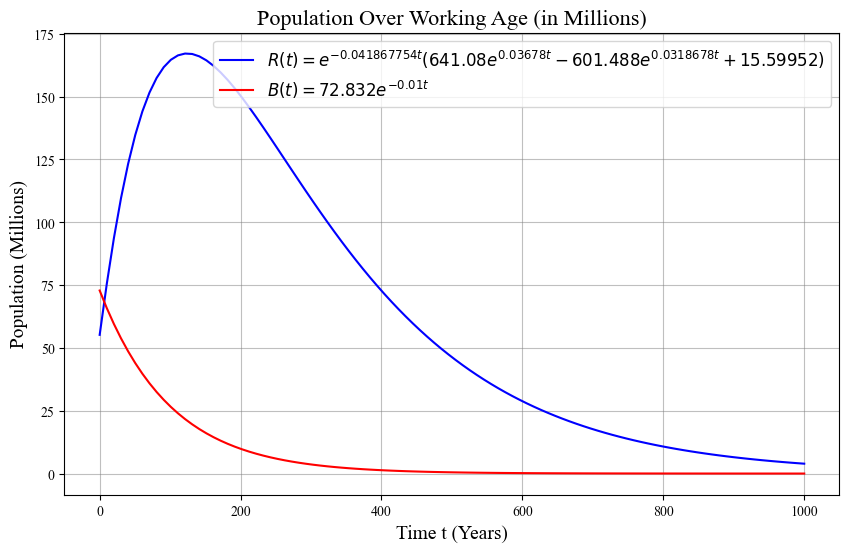

In [3]:
# plot for B(t) v.s. R(t)
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

r = 0.05
alpha = 0.06

def model(B, t):
    dBdt = r * B - alpha * B
    return dBdt

B0 = 72.832
t = np.linspace(0, 1000, 100)
solution = odeint(model, B0, t)

def R(t):
    return np.exp(-0.041867754 * t) * (641.08 * np.exp(0.03678 * t) - 601.488 * np.exp(0.0318678 * t) + c_1)

c_1 = 15.59952
r_values = R(t)


plt.figure(figsize=(10, 6))
plt.plot(t, r_values, label=r"$R(t) = e^{-0.041867754t}(641.08e^{0.03678t} - 601.488e^{0.0318678t} + 15.59952)$", color="blue")
plt.plot(t, solution, label=r"$B(t) = 72.832 e^{-0.01t}$", color="red")
plt.title("Population Over Working Age (in Millions)", fontsize=16, color="black")
plt.xlabel("Time t (Years)", fontsize=14, color="black")
plt.ylabel("Population (Millions)", fontsize=14, color="black")
plt.grid(alpha=0.5, color="gray")
plt.legend(fontsize=12)

plt.savefig("bt_rt_compare.pdf", format="pdf", bbox_inches="tight")

plt.show()


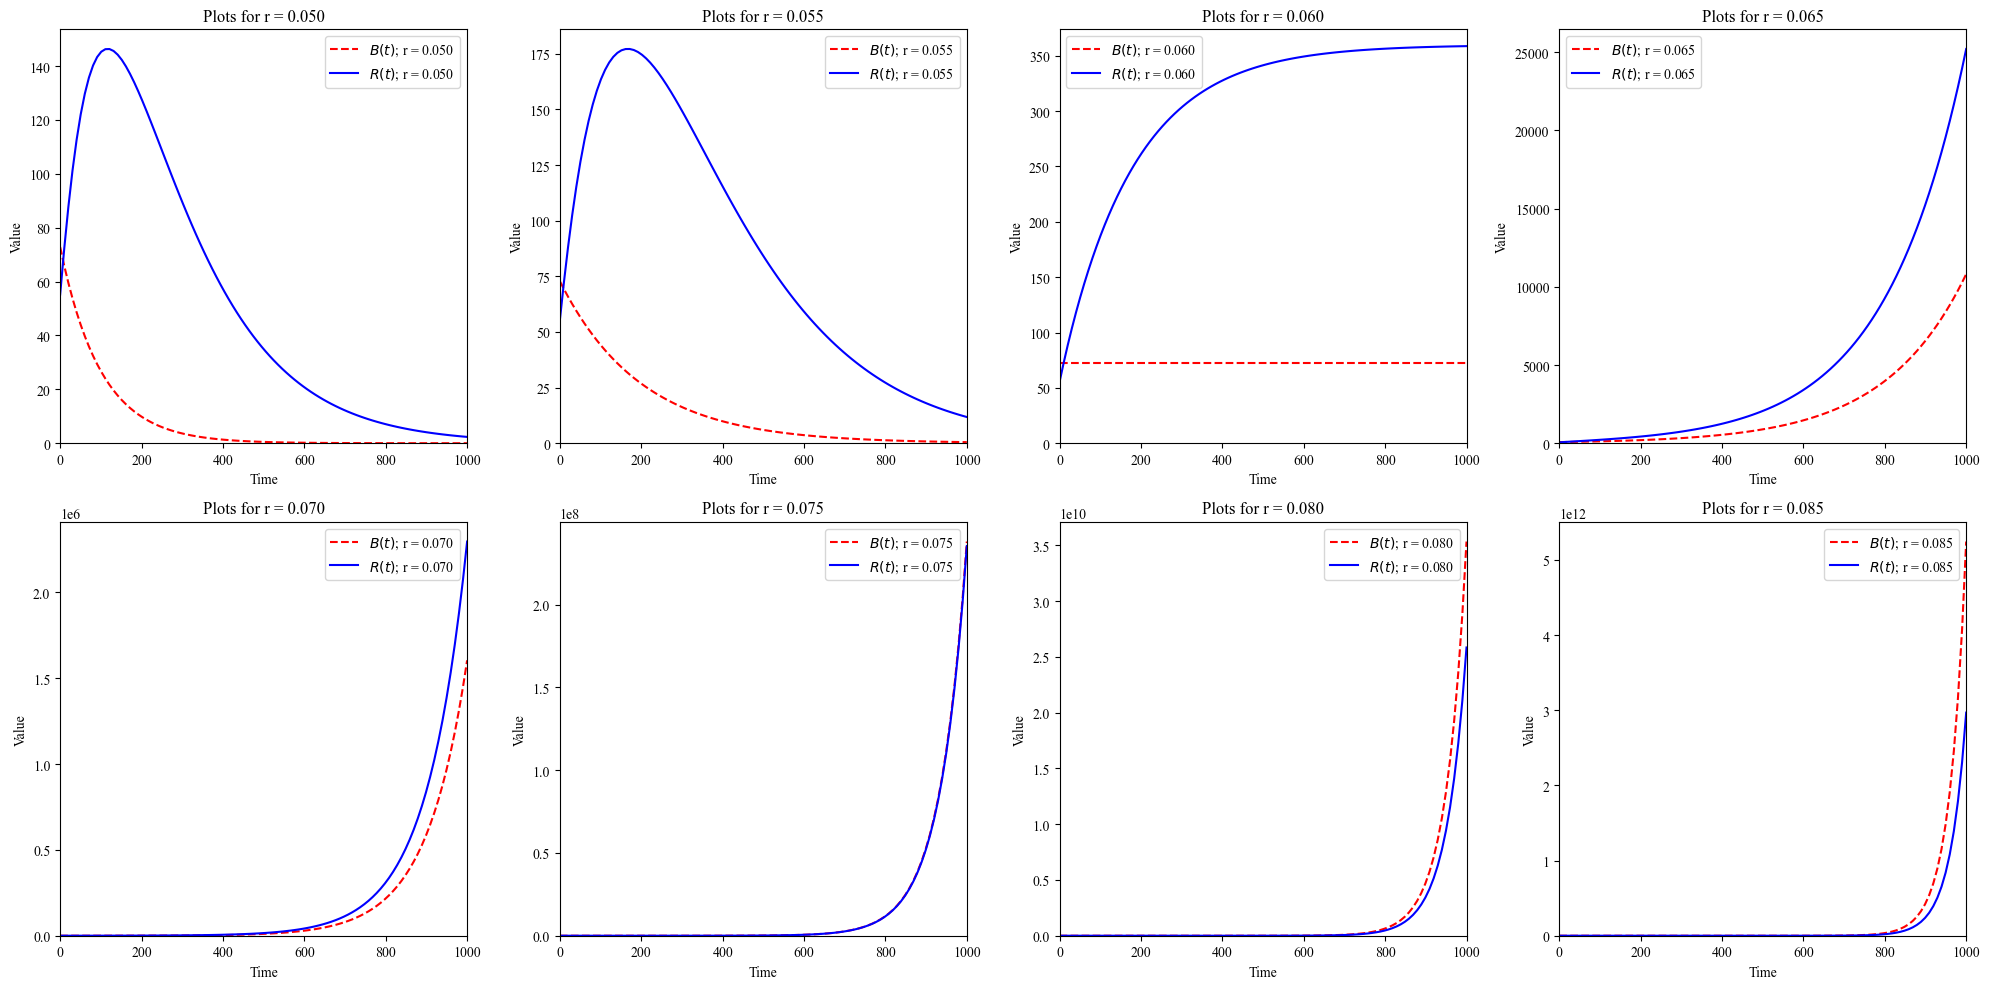

In [5]:
# different r, compare R(t)& B(t) by odeint
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

r_values = np.linspace(0.05, 0.085, 8)
alpha = 0.06
beta = 0.0193
gamma = 0.0137
delta = 0.04186

B0 = 72.832
R0 = 55.19152
W0 = 211.52284
C_values = []

t = np.linspace(0, 1000, 100)

def C_solve(r):
    right_side = (alpha * B0) / (r - alpha - (gamma - beta))
    return W0 - right_side

C_values = [C_solve(r) for r in r_values]

def model_b(B, t, r):
    return r * B - alpha * B

def model_r(R, t, r, C):
    B_term = (alpha * B0) / (r - alpha - (gamma - beta)) * np.exp((r - alpha) * t)
    return -delta * R + beta * (B_term + C * np.exp((gamma - beta) * t))

B_solutions = []
R_solutions = []

for r, C in zip(r_values, C_values):
    B_solution = odeint(model_b, B0, t, args=(r,))
    R_solution = odeint(model_r, R0, t, args=(r, C))
    B_solutions.append(B_solution.flatten())
    R_solutions.append(R_solution.flatten())

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

custom_xlim = (0, 1000)
custom_ylim = (0, 800)

plt.setp(axes, xlim=custom_xlim)


for i, r in enumerate(r_values):
    axes[i].plot(t, B_solutions[i], label=f"$B(t)$; r = {r:.3f}", color="red", linestyle='--')
    axes[i].plot(t, R_solutions[i], label=f"$R(t)$; r = {r:.3f}", color="blue")
    axes[i].legend()
    axes[i].set_title(f"Plots for r = {r:.3f}")
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Value")
    axes[i].set_ylim(bottom=0)

plt.tight_layout()
plt.savefig("different_r_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

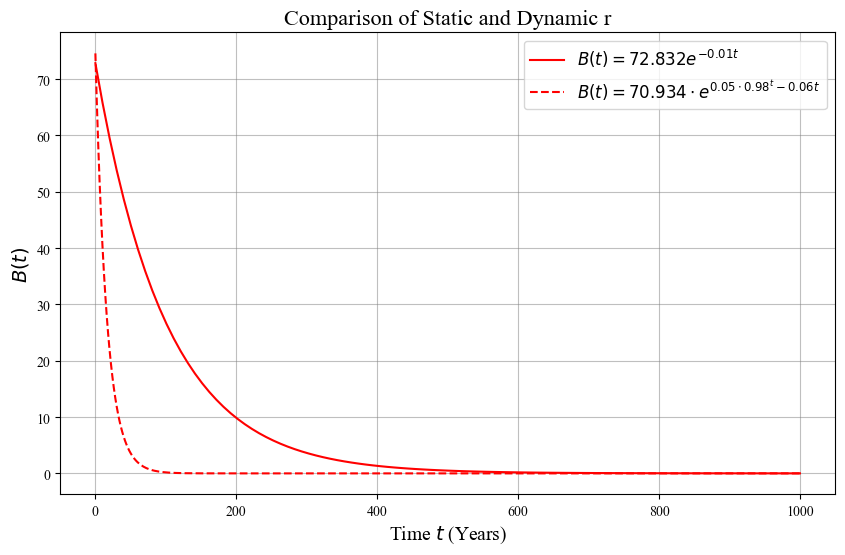

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Set the font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Define the parameters for the ODE-based model
r = 0.05
alpha = 0.06

def model(B, t):
    dBdt = r * B - alpha * B
    return dBdt

# Solve the ODE for the ODE-based model
B0 = 72.832
t_ode = np.linspace(0, 1000, 100)
solution = odeint(model, B0, t_ode)

# Define the parameters for the exponential model
def B(t):
    return 70.934 * np.exp(0.05 * 0.98**t - 0.06 * t)

# Define the timespan and compute B(t) for the exponential model
t_exp = np.linspace(0, 1000, 500)
B_t_exp = B(t_exp)

# Combine both plots into a single figure
plt.figure(figsize=(10, 6))

# Plot ODE-based model with a solid line
plt.plot(t_ode, solution, label=r"$B(t) = 72.832 e^{-0.01t}$", color="red", linestyle='-')

# Plot exponential function-based model with a dashed line
plt.plot(t_exp, B_t_exp, label=r"$B(t) = 70.934 \cdot e^{0.05 \cdot 0.98^t - 0.06t}$", color="red", linestyle='--')

# Add title, labels, and legend
plt.title("Comparison of Static and Dynamic r", fontsize=16, color="black")
plt.xlabel("Time $t$ (Years)", fontsize=14, color="black")
plt.ylabel("$B(t)$", fontsize=14, color="black")
plt.grid(alpha=0.5, color="gray")
plt.legend(fontsize=12)

# Save the combined plot as a PDF
plt.savefig("B_t_combined_single_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()
